## Introduction of PyTorch

PyTorch is a free and open source framework used for machine leanring research and application. It specializes in tensor computations, automatic differentiation, and GPU acceleration. PyTorch is one of the most popular deep learning libraries. See more introduction in https://pytorch.org/.


## Outline



- Basic operation
- Models
- Datasets
- Training and testing

## Basic operation

In [32]:
# import the pytorch library into environment and check its version
import torch
print("Using torch", torch.__version__)

# check if GPU is available and detectable. cpu is ok for this homework.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using torch 2.4.1+cu121
Using device: cpu


### Create Tensor

Tensor are the central data abstraction in PyTorch. You can generalize it to the concept you already know. For example, a vector is a 1-D tensor, and a matrix is a 2-D tensor. We can easily create a tensor of various shapes and number of dimensions by PyTorch.

In [33]:
# construct a 1-D tensor from a list
x = torch.tensor([1, 2, 3])
print(x)

# construct a 2-D tensor from a list
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x)

tensor([1, 2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


Given a tensor, we can obtain its shape by using `.size` or `.shape` method:

In [34]:
print("Shape of x is", x.shape)

print("Size of x is", x.size())

Shape of x is torch.Size([2, 3])
Size of x is torch.Size([2, 3])


Here are alternatives to create a tensor:

* `torch.zeros`: Creates a tensor filled with zeros
* `torch.ones`: Creates a tensor filled with ones
* `torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1
* `torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
* `torch.arange`: Creates a 1-D tensor containing the values $N,N+1,N+2,...,M$



In [35]:
# construct a tensor with random numbers with shape (4, 5)
x = torch.rand(4, 5)
print("Tensor created by torch.rand function", x)

# construct a tensor filled with the scalar value 0 with shape (2, 3, 4)
x = torch.zeros(2, 3, 4)
print("Tensor created by torch.arange function", x)

Tensor created by torch.rand function tensor([[0.6724, 0.8673, 0.6353, 0.9933, 0.0068],
        [0.2857, 0.1477, 0.5863, 0.7323, 0.5774],
        [0.5748, 0.0699, 0.7600, 0.4601, 0.9332],
        [0.7008, 0.7732, 0.9310, 0.5195, 0.3189]])
Tensor created by torch.arange function tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


### Tensor Operations

PyTorch supports various tensor operations. A full list of operations can be found in the [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#). For example, we can add two tensors with same shape:

In [36]:
x1 = torch.rand(2, 2)
x2 = torch.rand(2, 2)
x3 = x1 + x2  # return the sum of x1 and x2

print("x1:", x1)
print("x2:", x2)
print("x3:", x3)

x1: tensor([[0.9053, 0.8342],
        [0.0802, 0.0762]])
x2: tensor([[0.4487, 0.8498],
        [0.8831, 0.8022]])
x3: tensor([[1.3541, 1.6841],
        [0.9633, 0.8784]])


We also can calculate the matrix product between two tensors:

In [37]:
x = torch.rand(3)
W = torch.rand(2, 3)
h = torch.matmul(W, x)  # return the product between W and x

print("shape of x:", x.shape, "x:", x)  # shape: [3]
print("shape of W:", W.shape, "W:", W)  # shape: [2, 3]
print("shape of h:", h.shape, "h:", h)  # shape: [2]

shape of x: torch.Size([3]) x: tensor([0.3731, 0.7087, 0.2242])
shape of W: torch.Size([2, 3]) W: tensor([[0.1229, 0.8911, 0.4110],
        [0.3243, 0.6963, 0.8975]])
shape of h: torch.Size([2]) h: tensor([0.7695, 0.8157])


Another common operation aims at changing the shape of a tensor. A tensor'size can be re-organized to any other shape with the same number of elements. In PyTorch, this operation is called `view` or `reshape`:

In [38]:
x = torch.rand(2, 3)
x1 = x.view(6)
x2 = x.reshape(3, 2)

print("shape of x:", x.shape, "x:", x)  # shape: [2, 3]
print("shape of x1:", x1.shape, "x1:", x1)  # shape: [6]
print("shape of x2:", x2.shape, "x2:", x2)  # shape: [3, 2]

shape of x: torch.Size([2, 3]) x: tensor([[0.4809, 0.9776, 0.0825],
        [0.5382, 0.0434, 0.5947]])
shape of x1: torch.Size([6]) x1: tensor([0.4809, 0.9776, 0.0825, 0.5382, 0.0434, 0.5947])
shape of x2: torch.Size([3, 2]) x2: tensor([[0.4809, 0.9776],
        [0.0825, 0.5382],
        [0.0434, 0.5947]])


### Question 1 (5 points)

Given a 1-D tensor, what is the index of its maximum value?


In [39]:
def get_idx_max(x):
  # TODO: Implement a function that takes a tensor object
  # and returns the index of its maximum value.

  max_idx = -1

  ############# Your code here ############
  max_idx = torch.argmax(x).item()

  #########################################

  return max_idx

x = torch.rand(5)
max_idx = get_idx_max(x)
print('index of the maximum value of {} is {}'.format(x, max_idx))

index of the maximum value of tensor([0.4380, 0.1634, 0.4156, 0.3094, 0.2520]) is 0


## Models

We can use PyTorch to build deep learning model. Here we will give an example of using multi-layer perceptron (MLP) to perform image classification. We'll start with building a MLP.


In [40]:
# import neural network module of PyTorch
import torch.nn as nn
import torch.nn.functional as F

A MLP is built by stacking multiple linear layers:

$$Linear(X):=A X + b$$

with $X\in \mathbb{R}^{n\times k}$, $A\in \mathbb{R}^{m\times n}$, $b\in\mathbb{R}^{m\times 1}$. We can implement a linear layer with `nn.Linear`:



In [41]:
linear = nn.Linear(5, 10)  # creat a linear layer with n=5, m=10

print(linear.weight.shape)  # [10, 5]
print(linear.bias.shape)  # [10]

torch.Size([10, 5])
torch.Size([10])


We can feed a tensor into the linear module to perform linear transformation:

In [42]:
x = torch.rand(6, 5)

print("x:", x)
print("Linear(x):", linear(x))

x: tensor([[0.2809, 0.7841, 0.1630, 0.5687, 0.6197],
        [0.6580, 0.6588, 0.8822, 0.3198, 0.6587],
        [0.6378, 0.0970, 0.9958, 0.2231, 0.3193],
        [0.4442, 0.2903, 0.4290, 0.5630, 0.9154],
        [0.0920, 0.4770, 0.0913, 0.8662, 0.1114],
        [0.9987, 0.5474, 0.6008, 0.4283, 0.3298]])
Linear(x): tensor([[ 0.1004,  0.0930, -0.0979, -0.3988, -0.9489, -0.0949,  0.3885, -0.8743,
         -0.7843,  0.4851],
        [ 0.4196,  0.0093, -0.2650, -0.4608, -1.1444,  0.1634,  0.5843, -0.4744,
         -1.0694,  0.3678],
        [ 0.2817, -0.0291, -0.4587, -0.3436, -0.8308,  0.0801,  0.4761, -0.1365,
         -0.8769,  0.3536],
        [ 0.2368,  0.0071, -0.2479, -0.4445, -0.9197,  0.0598,  0.4559, -0.7201,
         -0.9331,  0.3217],
        [-0.1123, -0.0073, -0.3455, -0.3320, -0.5766, -0.2574,  0.3058, -0.7652,
         -0.4178,  0.7121],
        [ 0.4131,  0.2559, -0.1987, -0.5998, -1.0430,  0.0172,  0.3581, -0.4653,
         -0.8870,  0.3174]], grad_fn=<AddmmBackward0>)


Besides, to expand the capability and allow model to learn non-linear transformation between inputs and outputs, we will introduce the non-linear activation function between two linear layers. Here we use ReLU activation function:

![](https://github.com/Graph-and-Geometric-Learning/CPSC483-colab/blob/main/fig/relu.png?raw=1)

We can implement a ReLU functino by using `F.relu` or `nn.ReLU()`:

In [43]:
x = torch.rand(2, 3)
act_fn = nn.ReLU()

print("x:", x)
print("F.relu(x):", F.relu(x))
print("nn.relu(x):", act_fn(x))

x: tensor([[0.8561, 0.4170, 0.3942],
        [0.1198, 0.9835, 0.8232]])
F.relu(x): tensor([[0.8561, 0.4170, 0.3942],
        [0.1198, 0.9835, 0.8232]])
nn.relu(x): tensor([[0.8561, 0.4170, 0.3942],
        [0.1198, 0.9835, 0.8232]])


### Question 2 (10 points)

Now it is your time to build a MLP with linear layer and non-linear function. We use `nn.Module` to define a MLP class containing the basic modules of MLP. The modules we need will be defined in `__init__` function and the calculation will be performed in `forward` function.

In [44]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()

        # TODO: Define two Linear modules and a ReLU function.
        # The input size and output size of first Linear module should be input_dim and hidden_dim
        # The input size and output size of second Linear module should be hidden_dim and output_dim

        ############# Your code here ############
        self.linear_1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.linear_2 = nn.Linear(hidden_dim, output_dim)

        #########################################

    def forward(self, x):

        batch_size = x.shape[0]
        x = x.view(batch_size, -1)  # reshape the tensor to a 1-D vector
        out = 0

        # TODO: Use the modules you define in __init__ to perform calculation.
        # ReLU function should be used in the middle of two Linear modules.

        ############# Your code here ############
        ## (~3 line of code)
        x = self.linear_1(x)
        x = self.relu(x)
        out = self.linear_2(x)

        #########################################

        return out

As shown in the `MLP` class, we initialize the modules we need in `__init__` function, and perform the calculation of the model to predict the results in `forward` function. Here is an example to instantiate a MLP model:

In [45]:
model = MLP(input_dim=10, hidden_dim=20, output_dim=10)
print(model)  # show all the submodules

MLP(
  (linear_1): Linear(in_features=10, out_features=20, bias=True)
  (relu): ReLU()
  (linear_2): Linear(in_features=20, out_features=10, bias=True)
)


We can obtain the parameters of a module by its `parameters` functions, or `named_parameters` to get a name to each parameter object. For our MLP, we have the following parameters:

In [46]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear_1.weight, shape torch.Size([20, 10])
Parameter linear_1.bias, shape torch.Size([20])
Parameter linear_2.weight, shape torch.Size([10, 20])
Parameter linear_2.bias, shape torch.Size([10])


## Datasets

We are going to use a dataset for image classification called MNIST. It is a large database of handwritten digits, and widely used for training and testing in the field of image processing. We can esily load this dataset with the help of PyTorch.


In [47]:
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms as transforms

After importing required library, we can download the dataset of MNIST and save it in a folder. It will automatically create the folder if it doesn't exist.

In [48]:
ROOT = '.data'  # the folder for saving dataset

train_data = datasets.MNIST(root=ROOT,
                            train=True,
                            download=True)

To improve the model's generalization and robustness, we usually will preprocess and augment our dataset. Data augmentation is a group of methods for creating new data points from existing data in order to increase the amount of data. These operations are included in `transforms.Compose` function. Here are some common transforms:

- `RandomRotation` - randomly rotates the image between `(-x, +x)` degrees, where we have set `x = 5`.
- `RandomCrop` - randomly taking a square crop of the image.
- `ToTensor()` - this converts the image from a PIL format into a PyTorch tensor.
- `Normalize` - this subtracts the mean and divides by the standard deviations given.


In [49]:
mean = train_data.data.float().mean() / 255
std = train_data.data.float().std() / 255

train_transforms = transforms.Compose([
                            transforms.RandomRotation(5, fill=(0,)),
                            transforms.RandomCrop(28, padding=2),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[mean], std=[std])
                                      ])

test_transforms = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize(mean=[mean], std=[std])
                                     ])

Now with the transform function, we can load the train and test dataset of MNIST:

In [50]:
train_data = datasets.MNIST(root=ROOT,
                            train=True,
                            download=True,
                            transform=train_transforms)

test_data = datasets.MNIST(root=ROOT,
                           train=False,
                           download=True,
                           transform=test_transforms)



# Define the size of your training and validation datasets
train_size = 50000  # 50000 for training
val_size = len(train_data) - train_size  # 10000 for validation

# Split the dataset
train_data, val_data = data.random_split(train_data, [train_size, val_size])

print(f'Number of training examples: {len(train_data)}')  # check the number of the image in the train datasets
print(f'Number of training examples: {len(val_data)}')  # check the number of the image in the validation datasets
print(f'Number of testing examples: {len(test_data)}')  # check the number of the image in the test datasets

Number of training examples: 50000
Number of training examples: 10000
Number of testing examples: 10000


**NOTE**: The train/validation split is not ideal here because the validation dataset applies the `train_transform`, which is not what we want. However, we have kept it this way for simplicity.

### Question 3 (5 points)

What is the label of the image with index 100 in the train dataset?

In [51]:
def get_image_label(dataset, idx):
  # TODO: Implement a function that takes a dataset object,
  # an index of a image within the dataset, and returns the class/label
  # of the image (as an integer).

  label = -1

  ############# Your code here ############
  _, label = dataset[idx]

  #########################################

  return label

idx = 100
label = get_image_label(train_data, idx)
print('Image with index {} has label {}'.format(idx, label))

Image with index 100 has label 8


### Question 4 (5 points)

What is the number of classes in the MNIST dataset?

In [52]:
def get_num_classes(dataset):
  # TODO: Implement a function that takes a dataset object
  # and returns the number of classes for that dataset.

  num_classes = 0

  ############# Your code here ############
  num_classes = len(set(tuple[1] for tuple in list(dataset)))

  #########################################

  return num_classes

num_classes = get_num_classes(train_data)
print("dataset has {} classes".format(num_classes))

dataset has 10 classes


We can have a look at these images with the help of library `matplotlib`.

(-0.5, 27.5, 27.5, -0.5)

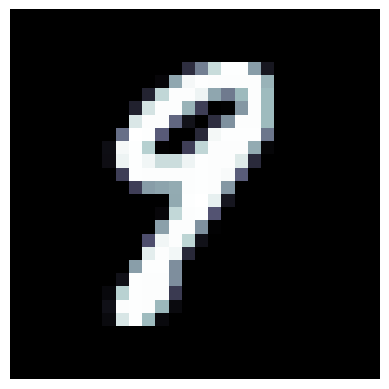

In [53]:
import matplotlib.pyplot as plt

image_idx = 50  # the index of the image we want to see
image = train_data[50][0]

fig = plt.figure()
plt.imshow(image.view(28, 28).cpu().numpy(), cmap='bone')  # plot the image
plt.axis('off')

`DataLoader` is also an important tool during our training. It can iterate over the dataset and yield a batch of images and labels to the model. The batchsize is a hyperparameter and we need to tune it during training. Here we set batchsize as 64, and define the dataloader for training and testing:

In [54]:
BATCH_SIZE = 64

train_loader = data.DataLoader(train_data,
                                 shuffle=True,  # shuffle the dataset in every epoch
                                 batch_size=BATCH_SIZE)


val_loader = data.DataLoader(val_data,
                                batch_size=BATCH_SIZE)
test_loader = data.DataLoader(test_data,
                                batch_size=BATCH_SIZE)

Now we need to initialize a MLP with appropriate `input_dim`, `hidden_dim` and `output_dim`. The image size is 28*28, and we will first flatten the image into a 784 element vector. So `input_dim` is 784 in MLP. `hidden_dim` is a tunable hyperparameter, and here we set it as 200. `output_dim` is the number of the classes. Please write the correct numbers and initialize a MLP:

In [55]:
input_dim, hidden_dim, output_dim = 784, 200, 10

model = MLP(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)

## Training and testing

Here is a total pipeline of training a model:

- pass a batch of data through the model and obtain the prediction
- compare the prediction with the label and calculate the loss of this batch
- calculate the gradient of each of the parameters with respect to the loss
- update the parameters with optimizer

To end-to-end train a model, we need to define a [optimizer](https://ruder.io/optimizing-gradient-descent/) and [loss function](https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23). Optimizer is a kind of algorithm used to updated the parameter effectively. Here we use Adam as our optimizer:

In [56]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

Then, we define loss function. How to choose a loss function? It depends on our current machine learning task:

- Mean Square Error: measured as the average of squared difference between predictions and actual observations. It is for regression task.
- Cross Entropy loss: computes the softmax activation function on the supplied predictions as well as the actual loss via negative log likelihood. It is for classification task.
- Mean Absolute Error: measured as the average of sum of absolute differences between predictions and actual observations. It is for regression task.

Our task is try to categorize the digit of the image, which is a kind of classification task. So here we define the Cross Entropy loss:

In [57]:
loss_fn = nn.CrossEntropyLoss()

Now we can start to train our model! What we will do is:

- we put the model into `train` mode
- iterate over our dataloader, returning batches of (image, label)
- clear the gradients calculated from the last batch
- calculate the loss between our predictions and the actual labels
- calculate the gradients of each parameter
- update the parameters by taking an optimizer step
- update our metrics

In [58]:
from tqdm import tqdm

def train(model, dataloader, optimizer, loss_fn):

    epoch_loss = 0
    model.train()

    for (x, y) in tqdm(dataloader, desc="Training"):  # iterate over our dataloader

        optimizer.zero_grad()  # clear the gradients

        y_pred = model(x)

        loss = loss_fn(y_pred, y)  # calculate the loss

        loss.backward()  # calculate the gradients of each parameter

        optimizer.step()  # update the parameters by taking an optimizer step

        epoch_loss += loss.item()

    return epoch_loss / len(dataloader)

### Question 5 (5 points)

After training the model, we need to evaluate it. Here we first need to define a function to calculate the accuracy. It will compare the model prediction against the real class label:

In [59]:
def calculate_accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the
  # pred tensor and the label tensor. Take the index of the highest value for
  # your prediction and compares it against the actual class label.

  acc = 0.0

  ############# Your code here ############
  # print(pred)
  # print(label)
  true = 0
  for i in range(len(pred)):
    for j in range(len(pred[i])):
      if pred[i, j] == max([p.item() for p in pred[i]]):
        if label[i].item() == j:
          true += 1
    acc = true/(len(label))
  #########################################

  return acc

pred = torch.rand(5, 3)  # 5 examples, 3 classes
label = torch.tensor([0, 1, 2, 1, 0])  # the true label of each example
print("accuracy:", calculate_accuracy(pred, label))

accuracy: 0.6


### Question 6 (10 points)

Then we define the evaluation function, which is similar as training one:

- we put the model into `eval` mode
- we wrap the iterations inside a `with torch.no_grad()`
- iterate over our dataloader, returning batches of (image, label)
- calculate the loss between our predictions and the actual labels
- calculate the accuracy
- we do not calculate or zero gradients
- we do not take an optimizer step
- update our metrics

In [60]:
def evaluate(model, dataloader, loss_fn):

    epoch_loss = 0
    epoch_acc = 0

    # TODO: Implement a evaluation function that takes the model,
    # dataloader, loss function and returns the average loss and accuracy.

    ############# Your code here ############
    ## (~8 lines of code)
    model.eval()
    with torch.no_grad():
      for (x, y) in dataloader:
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        acc = calculate_accuracy(y_pred, y)
        epoch_loss += loss.item()
        epoch_acc += acc

    #########################################

    return epoch_loss / len(dataloader), epoch_acc / len(dataloader)

The main difference between training process and evaluating process is:



Let's start to train our model!

In [61]:
from time import time

EPOCHS = 5  # number of training epoch
CHECK_VAL_EVERY_N_EPOCH = 1

best_valid_loss = float('inf')

for epoch in range(EPOCHS):

    start_time = time()  # record the start time

    train_loss = train(model, train_loader, optimizer, loss_fn)

    end_time = time()

    epoch_time = end_time - start_time

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_time}s')
    print(f'\tTrain Loss: {train_loss:.3f}')

    if epoch % CHECK_VAL_EVERY_N_EPOCH == 0:
      val_loss, val_acc = evaluate(model, val_loader, loss_fn)
      print(f'Val Loss: {val_loss:.3f} | Val Acc: {val_acc*100:.2f}%')


torch.save(model.state_dict(), 'model.pt')  # saving model's parameters

Training: 100%|██████████| 782/782 [00:33<00:00, 23.61it/s]


Epoch: 01 | Epoch Time: 33.12224745750427s
	Train Loss: 0.436
Val Loss: 0.234 | Val Acc: 93.21%


Training: 100%|██████████| 782/782 [00:32<00:00, 24.37it/s]


Epoch: 02 | Epoch Time: 32.09669375419617s
	Train Loss: 0.184
Val Loss: 0.172 | Val Acc: 95.02%


Training: 100%|██████████| 782/782 [00:30<00:00, 25.23it/s]


Epoch: 03 | Epoch Time: 31.004374027252197s
	Train Loss: 0.150
Val Loss: 0.174 | Val Acc: 95.17%


Training: 100%|██████████| 782/782 [00:30<00:00, 25.23it/s]


Epoch: 04 | Epoch Time: 30.99575400352478s
	Train Loss: 0.134
Val Loss: 0.143 | Val Acc: 95.75%


Training: 100%|██████████| 782/782 [00:32<00:00, 24.32it/s]


Epoch: 05 | Epoch Time: 32.168670892715454s
	Train Loss: 0.119
Val Loss: 0.145 | Val Acc: 95.61%


After 5 epochs' training, we can load the parameter and evaluate the model:

In [62]:
model.load_state_dict(torch.load('model.pt'))

test_loss, test_acc = evaluate(model, test_loader, loss_fn)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

<ipython-input-62-3c2ace7f4f37>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pt'))


Test Loss: 0.092 | Test Acc: 96.84%


## Submission

Make sure to run all the cells and save a copy of this colab in your driver. If you complete this notebook, download the colab and upload your work to canvas to submit it.
